### Script de preparação de dados do Trabalho de Conclusão
#### Curso de Especialização Lato Sensu em Ciência de Dados e Big Data
#### Instituição Pontifícia Universidade Católica de Minas Gerais
##### Título do trabalho: 'ANÁLISE DE SÉRIES TEMPORAIS PARA PREDIÇÃO DO PREÇO DE AÇÚCAR E ETANOL'
Autor: Rafael Vasconcelos Valadares <br>
Data: 04/05/2024 <br>
Email: rafaelvvaladares@hotmail.com <br>
Etapa: 4- Engenharia e seleção de atributos

In [1]:
# Definindo o diretório de trabalho

import os

# Obtendo o diretório de trabalho atual
diretorio_atual=os.getcwd()

# Mudando o diretório de trabalho
novo_diretorio= 'C:/Users/rafae/OneDrive/Área de Trabalho/Github_projetos/TCC/TCC_CANA/Dados_prontos'
os.chdir(novo_diretorio)

In [2]:
#Listando arquivos presentes no diretório atual

arquivos=os.listdir(novo_diretorio)

# Imprimindo os nomes dos arquivos

for arquivo in arquivos:
    print(arquivo)

dataset_atualizada.xlsx
decomposição_serie_acucar_plot.png
decomposição_serie_etanol_plot.png
df_sem_outliers.xlsx
eda_geral.xlsx
eda_preços.png
serie_etanol_açúcar_plot.png


In [3]:
# Importando o dataset preparado na etapa anterior
import pandas as pd

dados=pd.read_excel('df_sem_outliers.xlsx')
dados.head()

,data,safra,ano,mes,dia,preco_etanol_real,preco_etanol_dolar,preco_acucar_real,preco_acucar_dolar,ano_colheita,...,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,etanol_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,2012-01-03,2012/13,2012,1,3,1231.5,672.95,63.21,34.54,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
1,2012-01-04,2012/13,2012,1,4,1239.5,677.69,63.38,34.65,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
2,2012-01-05,2012/13,2012,1,5,1248.5,679.27,62.96,34.25,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
3,2012-01-06,2012/13,2012,1,6,1259.0,679.07,62.90,33.93,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804
4,2012-01-09,2012/13,2012,1,9,1265.0,688.25,62.28,33.89,2012,...,72814482,45758,99676942,42682111,2.743,2.034,1.632,0,0,20.357804


In [113]:
# Remoção de variáveis sem informação útil para o dataset de previsão do preço do etanol

dados_etanol = dados.drop(columns = ['data',
    'safra', 'ano', 'mes', 'dia', 
    'preco_etanol_dolar', 'preco_acucar_dolar', 
    'ano_colheita', 'etanol_preco_medio'
])

dados_etanol.head()
#remover: safra, ano, mes, dia, preco_etanol_dolar, preco_acucar_dolar, ano_colheita, etanol_preco_medio

,preco_etanol_real,preco_acucar_real,area_brasil,area_centro-oeste,area_centro-sul,area_nordeste,area_norte,area_norte/nordeste,area_sudeste,produtividade_brasil,...,acucar_exportado_dolares,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,1231.5,63.21,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
1,1239.5,63.38,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
2,1248.5,62.96,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
3,1259.0,62.90,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
4,1265.0,62.28,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804


In [114]:
dados_etanol.dtypes

preco_etanol_real       float64
preco_acucar_real       float64
area_brasil             float64
area_centro-oeste       float64
area_centro-sul         float64
                         ...   
gasolina_preco_medio    float64
gnv_preco_medio         float64
PPI                       int64
pandemia                  int64
perc_eta_gas            float64
Length: 79, dtype: object

In [71]:
# Remoção de variáveis sem informação útil para o dataset de previsão do preço do açúcar

dados_acucar = dados.drop(columns = ['data',
    'safra', 'ano', 'mes', 'dia', 
    'preco_etanol_dolar', 'preco_acucar_dolar', 
    'ano_colheita', 'etanol_preco_medio'
])

dados_acucar.head()
#remover: safra, ano, mes, dia, preco_etanol_dolar, preco_acucar_dolar, ano_colheita, etanol_preco_medio

,preco_etanol_real,preco_acucar_real,area_brasil,area_centro-oeste,area_centro-sul,area_nordeste,area_norte,area_norte/nordeste,area_sudeste,produtividade_brasil,...,acucar_exportado_dolares,etanol_exportado_dolares,acucar_importado_dolares,etanol_importado_dolares,frota_automovel,gasolina_preco_medio,gnv_preco_medio,PPI,pandemia,perc_eta_gas
0,1231.5,63.21,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
1,1239.5,63.38,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
2,1248.5,62.96,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
3,1259.0,62.90,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804
4,1265.0,62.28,8485.0,1504.11,7359.79,1083.22,41.99,1125.21,5243.29,69407.0,...,745050324,72814482,45758,99676942,42682111,2.743,1.632,0,0,20.357804


# Transformação dos dados

In [115]:
dados_etanol.columns

Index(['preco_etanol_real', 'preco_acucar_real', 'area_brasil',
       'area_centro-oeste', 'area_centro-sul', 'area_nordeste', 'area_norte',
       'area_norte/nordeste', 'area_sudeste', 'produtividade_brasil',
       'produtividade_centro-oeste', 'produtividade_centro-sul',
       'produtividade_nordeste', 'produtividade_norte',
       'produtividade_norte/nordeste', 'produtividade_sudeste',
       'producao_brasil', 'producao_centro-oeste', 'producao_centro-sul',
       'producao_nordeste', 'producao_norte', 'producao_norte/nordeste',
       'producao_sudeste', 'acucar_brasil', 'acucar_centro-oeste',
       'acucar_centro-sul', 'acucar_nordeste', 'acucar_norte',
       'acucar_norte/nordeste', 'acucar_sudeste', 'etanol_total_brasil',
       'etanol_total_centro-oeste', 'etanol_total_centro-sul',
       'etanol_total_nordeste', 'etanol_total_norte',
       'etanol_total_norte/nordeste', 'etanol_total_sudeste',
       'etanol_anidro_brasil', 'etanol_anidro_centro-oeste',
       'etano

In [116]:
# Normalização dos dados - etanol
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

variavel_alvo = 'preco_etanol_real'
def normaliza_dataset(variavel_alvo, dados_etanol):
    variavel_alvo = variavel_alvo

    X_etanol = dados_etanol.drop(columns=[variavel_alvo])
    y_etanol = dados_etanol[variavel_alvo]

    # Inicializar o MinMaxScaler
    scaler = MinMaxScaler()

    # Transformar as variáveis preditoras
    X_etanol_normalizado = scaler.fit_transform(X_etanol)

    atributos_normalizados = pd.DataFrame(X_etanol_normalizado, columns=X_etanol.columns)

    # Combinando com a variável alvo
    dados_etanol_normalizado = pd.concat([atributos_normalizados, y_etanol.reset_index(drop=True)], axis=1)
    
    return dados_etanol_normalizado

dados_etanol_normalizados = normaliza_dataset(variavel_alvo, dados_etanol)
print(dados_etanol_normalizados)

      preco_acucar_real  area_brasil  area_centro-oeste  area_centro-sul  \
0              0.180054     0.254171           0.000000          0.00000   
1              0.181533     0.254171           0.000000          0.00000   
2              0.177878     0.254171           0.000000          0.00000   
3              0.177356     0.254171           0.000000          0.00000   
4              0.171961     0.254171           0.000000          0.00000   
...                 ...          ...                ...              ...   
2516           0.849012     0.000000           0.825074          0.01313   
2517           0.862675     0.000000           0.825074          0.01313   
2518           0.862675     0.000000           0.825074          0.01313   
2519           0.819511     0.000000           0.825074          0.01313   
2520           0.819511     0.000000           0.825074          0.01313   

      area_nordeste  area_norte  area_norte/nordeste  area_sudeste  \
0           1.000

In [117]:
len(dados_etanol_normalizados.columns)

79

In [118]:
# Padronização dos dados - açúcar

variavel_alvo = 'preco_acucar_real'

dados_acucar_normalizados = normaliza_dataset(variavel_alvo, dados_acucar)
print(dados_acucar_normalizados)

      preco_etanol_real  area_brasil  area_centro-oeste  area_centro-sul  \
0              0.073999     0.254171           0.000000          0.00000   
1              0.076714     0.254171           0.000000          0.00000   
2              0.079769     0.254171           0.000000          0.00000   
3              0.083333     0.254171           0.000000          0.00000   
4              0.085370     0.254171           0.000000          0.00000   
...                 ...          ...                ...              ...   
2516           0.663442     0.000000           0.825074          0.01313   
2517           0.663951     0.000000           0.825074          0.01313   
2518           0.664630     0.000000           0.825074          0.01313   
2519           0.665139     0.000000           0.825074          0.01313   
2520           0.663442     0.000000           0.825074          0.01313   

      area_nordeste  area_norte  area_norte/nordeste  area_sudeste  \
0           1.000

# Seleção de variáveis com filtragem usando Random Forest

In [133]:
# Açúcar
X_acucar = dados_acucar_normalizados.drop(columns=['preco_acucar_real'])
y_acucar = dados_acucar_normalizados['preco_acucar_real']

In [134]:
#!pip install mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [135]:
len(X_acucar.columns)

78

# Açúcar

In [136]:
# Açúcar
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt


# Definição do modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajuste do modelo
model.fit(X_acucar, y_acucar)

# Obtendo variáveis de importância
importances = model.feature_importances_

# Rankeando variáveis pela importância
indices = np.argsort(importances)[::-1]

# Selecionando top 20 variáveis
top_n_features = 20
selected_features = X_acucar_filtered.columns[indices][:top_n_features]

# Obtendo variáveis com suas respectivas importâncias
top_importances = importances[indices][:top_n_features]
top_feature_names = X_acucar_filtered.columns[indices][:top_n_features]

# Printando os resultados
print("Top features:", selected_features)

Top features: Index(['pib', 'cana_de_acucar_preco_tonelada', 'area_centro-oeste',
       'acucar_centro-oeste', 'gnv_preco_medio', 'acucar_centro-sul',
       'preco_etanol_real', 'acucar_exportado_dolares', 'acucar_sudeste',
       'acucar_brasil', 'acucar_importado_dolares', 'preco_petroleo', 'gbp',
       'usd', 'preco_acucar_int', 'enos', 'gasolina_preco_medio',
       'etanol_importado_dolares', 'producao_brasil', 'area_nordeste'],
      dtype='object')


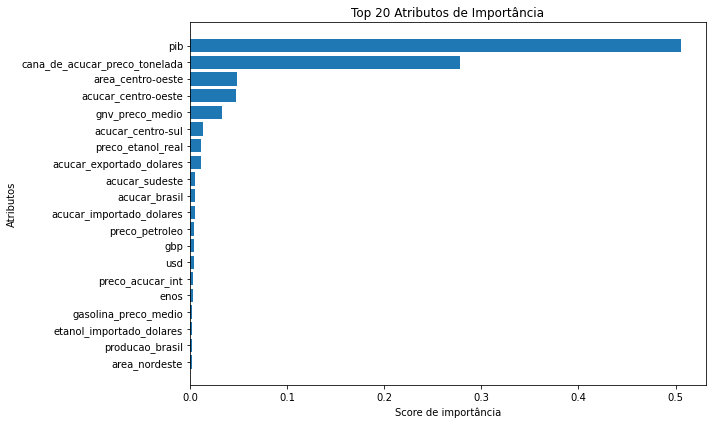

In [137]:
# Plotagem do gráfico das variáveis de importância
plt.figure(figsize=(10, 6))
plt.title("Top 20 Atributos de Importância")
plt.barh(range(top_n_features), top_importances[::-1], align='center')
plt.yticks(range(top_n_features), top_feature_names[::-1])
plt.xlabel("Score de importância")
plt.ylabel("Atributos")
plt.tight_layout()
plt.show()

In [125]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calcula_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

def seleciona_variaveis(variavel_alvo, dados, corr_threshold=0.7, vif_threshold=10, top_n=20):
    # Separando preditores e alvo
    X = dados.drop(columns=[variavel_alvo])
    y = dados[variavel_alvo]
    
    # Etapa 1: Avaliar a importância das variáveis usando Random Forest
    rf = RandomForestRegressor()
    rf.fit(X, y)
    importancias = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
    
    # Selecionar as top N variáveis mais importantes
    top_importantes = importancias.head(top_n).index.tolist()
    X_top = X[top_importantes]
    
    # Etapa 2: Remover variáveis altamente correlacionadas dentro das top N
    corr_matrix = X_top.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop_corr = [column for column in upper.columns if any(upper[column] > corr_threshold)]
    
    while to_drop_corr:
        column_to_drop = importancias.loc[to_drop_corr].sort_values(by='importance').index[0]
        if column_to_drop in top_importantes:
            top_importantes.remove(column_to_drop)
            X_top = X[top_importantes]
            corr_matrix = X_top.corr().abs()
            upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
            to_drop_corr = [column for column in upper.columns if any(upper[column] > corr_threshold)]
        else:
            break
    
    X_reduzido_corr = X[top_importantes]
    
    # Etapa 3: Remover variáveis com alto VIF dentro das top N
    vif_data = calcula_vif(X_reduzido_corr)
    while vif_data['VIF'].max() > vif_threshold:
        feature_to_drop = vif_data.sort_values('VIF', ascending=False)['feature'].iloc[0]
        if feature_to_drop in top_importantes:
            top_importantes.remove(feature_to_drop)
            X_reduzido_corr = X_reduzido_corr.drop(columns=[feature_to_drop])
            vif_data = calcula_vif(X_reduzido_corr)
        else:
            break
    
    return top_importantes


In [126]:
variavel_alvo = 'preco_acucar_real'


variaveis_finais = seleciona_variaveis(variavel_alvo, dados_acucar_normalizados)

print("Variáveis finais selecionadas:", variaveis_finais)
len(variaveis_finais)

Variáveis finais selecionadas: ['pib', 'acucar_centro-oeste', 'acucar_exportado_dolares', 'acucar_importado_dolares', 'preco_petroleo', 'enos', 'etanol_importado_dolares', 'producao_brasil']


C:\Users\rafae\AppData\Local\Temp\ipykernel_7788\128606517.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
C:\Users\rafae\AppData\Local\Temp\ipykernel_7788\128606517.py:38: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(

8

In [127]:
# Select the top features
X_selected = X_acucar[variaveis_finais]

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_acucar, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [128]:
# Train the model with the selected features

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model with multiple metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
me = np.mean(y_test - y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')

Mean Squared Error (MSE): 3.5880563351039982
R-squared (R²): 0.9956905743438539
Root Mean Squared Error (RMSE): 1.8942165491579885
Mean Absolute Percentage Error (MAPE): 1.4026345661390565
Mean Absolute Error (MAE): 1.0328111892974978
Mean Error (ME): -0.06022437505893521


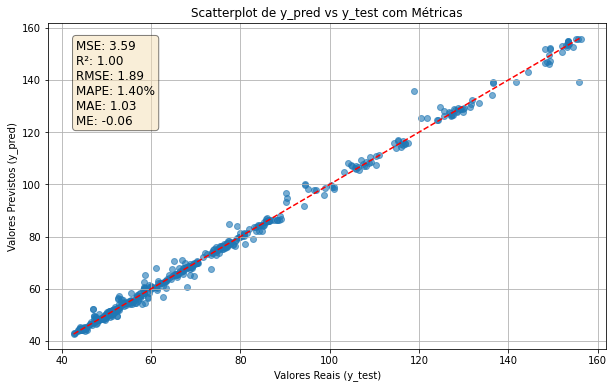

In [129]:
# Criar o scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha de 45 graus

# Adicionar as métricas ao gráfico
textstr = (f'MSE: {mse:.2f}\n'
           f'R²: {r2:.2f}\n'
           f'RMSE: {rmse:.2f}\n'
           f'MAPE: {mape:.2f}%\n'
           f'MAE: {mae:.2f}\n'
           f'ME: {me:.2f}')

# Posição do texto no gráfico
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Adicionar títulos e rótulos
plt.title('Scatterplot de y_pred vs y_test com Métricas')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Previstos (y_pred)')
plt.grid(True)
plt.show()

# Etanol

In [138]:
# Etanol
X_etanol = dados_etanol_normalizados.drop(columns=['preco_etanol_real'])
y_etanol = dados_etanol_normalizados['preco_etanol_real']

In [139]:
# Açúcar
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt


# Definição do modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajuste do modelo
model.fit(X_etanol, y_etanol)

# Obtendo variáveis de importância
importances = model.feature_importances_

# Rankeando variáveis pela importância
indices = np.argsort(importances)[::-1]

# Selecionando top 20 variáveis
top_n_features = 20
selected_features = X_etanol.columns[indices][:top_n_features]

# Obtendo variáveis com suas respectivas importâncias
top_importances = importances[indices][:top_n_features]
top_feature_names = X_etanol.columns[indices][:top_n_features]

# Printando os resultados
print("Top features:", selected_features)

Top features: Index(['gasolina_preco_medio', 'cana_de_acucar_preco_tonelada',
       'preco_acucar_int', 'eur', 'preco_acucar_real', 'preco_petroleo', 'pib',
       'etanol_importado_dolares', 'gnv_preco_medio', 'gbp', 'ipca', 'usd',
       'acucar_exportado_dolares', 'acucar_importado_dolares', 'enos',
       'etanol_exportado_dolares', 'desemprego', 'igp-m', 'acucar_centro-sul',
       'producao_norte'],
      dtype='object')


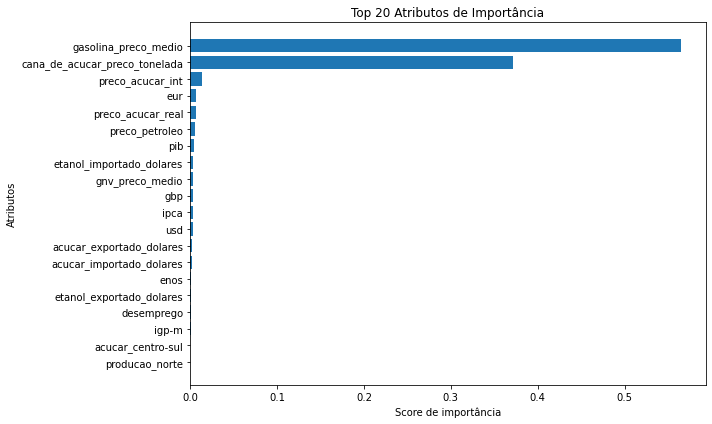

In [140]:
# Plotagem do gráfico das variáveis de importância
plt.figure(figsize=(10, 6))
plt.title("Top 20 Atributos de Importância")
plt.barh(range(top_n_features), top_importances[::-1], align='center')
plt.yticks(range(top_n_features), top_feature_names[::-1])
plt.xlabel("Score de importância")
plt.ylabel("Atributos")
plt.tight_layout()
plt.show()

In [141]:
variavel_alvo = 'preco_etanol_real'


variaveis_finais = seleciona_variaveis(variavel_alvo, dados_etanol_normalizados)

print("Variáveis finais selecionadas:", variaveis_finais)
len(variaveis_finais)

Variáveis finais selecionadas: ['gasolina_preco_medio', 'preco_acucar_int', 'preco_petroleo', 'etanol_importado_dolares', 'acucar_exportado_dolares', 'acucar_importado_dolares', 'enos', 'etanol_exportado_dolares', 'igp-m', 'etanol_total_norte']


C:\Users\rafae\AppData\Local\Temp\ipykernel_7788\128606517.py:29: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
C:\Users\rafae\AppData\Local\Temp\ipykernel_7788\128606517.py:38: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(

10

In [142]:
# Select the top features
X_selected = X_etanol[variaveis_finais]

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_etanol, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [144]:
# Train the model with the selected features

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model with multiple metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mae = mean_absolute_error(y_test, y_pred)
me = np.mean(y_test - y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Error (ME): {me}')

Mean Squared Error (MSE): 2749.369899900989
R-squared (R²): 0.9935811558733223
Root Mean Squared Error (RMSE): 52.43443429561331
Mean Absolute Percentage Error (MAPE): 1.5142587430915944
Mean Absolute Error (MAE): 28.653386138613865
Mean Error (ME): 0.45928712871286825


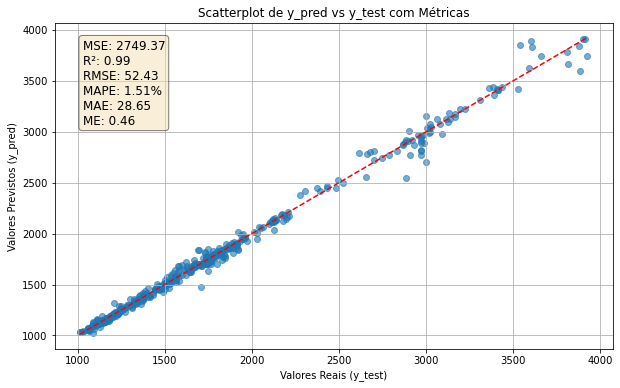

In [145]:
# Criar o scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha de 45 graus

# Adicionar as métricas ao gráfico
textstr = (f'MSE: {mse:.2f}\n'
           f'R²: {r2:.2f}\n'
           f'RMSE: {rmse:.2f}\n'
           f'MAPE: {mape:.2f}%\n'
           f'MAE: {mae:.2f}\n'
           f'ME: {me:.2f}')

# Posição do texto no gráfico
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

# Adicionar títulos e rótulos
plt.title('Scatterplot de y_pred vs y_test com Métricas')
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Previstos (y_pred)')
plt.grid(True)
plt.show()